In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
traindata = pd.read_csv('kdd_train.csv')
testdata = pd.read_csv('kdd_test.csv')

In [3]:
data = pd.concat([traindata,testdata])
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
categ = ['protocol_type','service','flag','labels']
# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

In [5]:
X = data.iloc[:,1:41]
Y = data['labels']

In [6]:
scaler = Normalizer().fit(X)
X = scaler.transform(X)

In [7]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [8]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [9]:
#cnn.add(Convolution1D(128, 3 ,activation="relu",input_shape=(40, 1)))
model = Sequential()
model.add(SimpleRNN(128,input_shape=(40, 1)))
model.add(Dropout(0.1))
model.add(Dense(40))
model.add(Activation('softmax'))

In [10]:
# define optimizer and objective, compile cnn

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [11]:
# train
checkpointer = callbacks.ModelCheckpoint(filepath="results/cnn1results/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')


In [12]:
history=model.fit(X_train, Y_train, epochs=75,verbose=1,batch_size=500,validation_data=(X_test, Y_test),callbacks=[checkpointer])


Epoch 1/75
238/238 [==============================] - 10s 38ms/step - loss: 0.5846 - accuracy: 0.8641 - val_loss: 0.3466 - val_accuracy: 0.8989
Epoch 2/75
238/238 [==============================] - 9s 37ms/step - loss: 0.3209 - accuracy: 0.9096 - val_loss: 0.2879 - val_accuracy: 0.9235
Epoch 3/75
238/238 [==============================] - 9s 36ms/step - loss: 0.2556 - accuracy: 0.9303 - val_loss: 0.2467 - val_accuracy: 0.9380
Epoch 4/75
238/238 [==============================] - 8s 35ms/step - loss: 0.2238 - accuracy: 0.9372 - val_loss: 0.1783 - val_accuracy: 0.9492
Epoch 5/75
238/238 [==============================] - 8s 35ms/step - loss: 0.2041 - accuracy: 0.9432 - val_loss: 0.2434 - val_accuracy: 0.9303
Epoch 6/75
238/238 [==============================] - 8s 35ms/step - loss: 0.1985 - accuracy: 0.9448 - val_loss: 0.1774 - val_accuracy: 0.9521
Epoch 7/75
238/238 [==============================] - 8s 34ms/step - loss: 0.2102 - accuracy: 0.9417 - val_loss: 0.1748 - val_accuracy: 0.951

Epoch 38/75
238/238 [==============================] - 8s 35ms/step - loss: 0.1014 - accuracy: 0.9681 - val_loss: 0.0937 - val_accuracy: 0.9686
Epoch 39/75
238/238 [==============================] - 8s 35ms/step - loss: 0.1218 - accuracy: 0.9635 - val_loss: 0.2627 - val_accuracy: 0.9302
Epoch 40/75
238/238 [==============================] - 8s 35ms/step - loss: 0.1642 - accuracy: 0.9504 - val_loss: 0.1246 - val_accuracy: 0.9633ss: 0.1644 - accuracy: 0.
Epoch 41/75
238/238 [==============================] - 8s 36ms/step - loss: 0.1264 - accuracy: 0.9614 - val_loss: 0.0979 - val_accuracy: 0.9690
Epoch 42/75
238/238 [==============================] - 8s 35ms/step - loss: 0.1127 - accuracy: 0.9657 - val_loss: 0.0966 - val_accuracy: 0.9691
Epoch 43/75
238/238 [==============================] - 8s 35ms/step - loss: 0.1018 - accuracy: 0.9687 - val_loss: 0.0943 - val_accuracy: 0.9693
Epoch 44/75
238/238 [==============================] - 8s 34ms/step - loss: 0.1318 - accuracy: 0.9608 - val_los

Epoch 75/75
238/238 [==============================] - 8s 35ms/step - loss: 0.0863 - accuracy: 0.9723 - val_loss: 0.0830 - val_accuracy: 0.9744


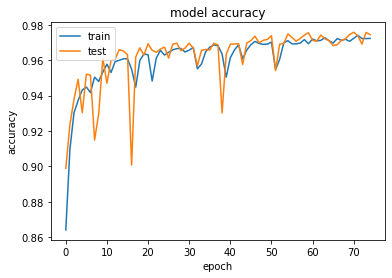

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

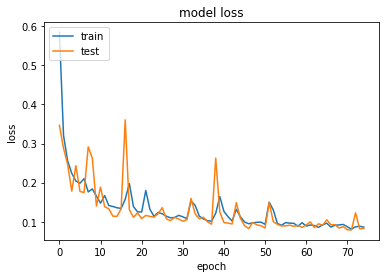

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save("results/cnn1results/cnn_model.hdf5")